<a href="https://colab.research.google.com/github/RSK11547210/saikrishna_INFO5502_spring2022/blob/main/lab_assignment_06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## The sixth Lab-assignment (03/24/2022, 50 points in total)

The purpose of this exercise is to build a simple predicition model which can helpyou understand the workflow of machine learning. 

### Task Decription 

The goal of this assignment is to predict bike share use, given the hour, day, and information about the weather. Companies like Divvy try to predict how much demand there will be for bikes on any given day to allocate resources to redistribute bikes so that, ideally, very few bike stations are ever full (when you can’t park your bike) or empty (when you can’t pick up a bike if you want to).

The data (link: https://github.com/unt-iialab/info5502-spring2022/tree/main/datasets/lab_assignment_06) in Github provides detailed information on the data set and necessary downloads.

### Data Description

You are provided hourly rental data spanning two years (link: https://github.com/unt-iialab/info5502-spring2022/tree/main/datasets/lab_assignment_06). For this task, the training set is comprised of the first 16 days of each month, while the test set is the 17-19th day of the month. You must predict the total count of bikes rented during each hour covered by the test set, using only information available prior to the rental period. That is, predict "count" without using "count" or its components "casual" and "registered".

Data Fields

datetime - hourly date + timestamp

season - 1 = spring, 2 = summer, 3 = fall, 4 = winter

holiday - whether the day is considered a holiday

workingday - whether the day is neither a weekend nor holiday

weather -

1 - Clear, Few clouds, Partly cloudy, Partly cloudy

2 - Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist

3 - Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

4 - Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

temp - temperature in Celsius

atemp - "feels like" temperature in Celsius

humidity - relative humidity

windspeed - wind speed

casual - number of non-registered user rentals initiated

registered - number of registered user rentals initiated

count - number of total rentals

### Output

Submission Format

Your output (a separate file) must have a header line and should be structured in the following format:

 datetime,count
 
 2011-01-20 00:00:00,0 
 
 2011-01-20 01:00:00,0
 
 2011-01-20 02:00:00,0
 
 ...
 
The tutorial code should demonstrate how to generate such a file from a very simple prediction model. Note, these prediction are to be done on the test file under the data tab, where you do not know the actual count, and should match the rows of the test file in count and order.

Your predictions should be compared to the ground truth information (sample_prediction.csv). Score are calculated using Root Mean Squared Error (RMSE).

### Tips

●	Add features: Pick columns/features from the data you already have. Or make a new feature from the ones you have. For example, the tutorial makes ‘hour’ from the datetime stamp, which seemed very useful. How about ‘month’?

●	Model selection: Try different models. Make sure they are regression models rather than classification models. Tip: random forest regression is a good, all around modeling strategy on complicated data sets.

●	Model tuning: Almost all regression models have parameters to tune (“hyperparameters”). E.g. polynomial regression has the degree of the polynomial (n = 1 for a line, n=2 for a quadratic fit, n=3 for a cubic fit…). Generally, one extreme makes the model too simple (e.g. a line for a curved set of points) and the other extreme makes the model overfit/be too complex, and usually the right choice is in between. For some models it is obvious what to tune (e.g. k for k nearest neighbors regression) and some don’t need much tuning with defaults that often work well. e.g. try changing the number of trees used in the random forest model!

●	Cross validation: The tutorial has a simple way of separating training and test data, however, there are better ways of splitting training and test data. Look into cross validation techniques, which are more reliable than an arbitrary split of training and test data.

●	Separate models for ...: Notice that count comes from just adding casual riders and registered riders. However, what if these two types of riders acted very differently? It might make sense to make two separate models and just add the results of both models together. This is also true for any subsets of your data that may behave wildly differently (e.g. create a separate model for each season?)

### Your code

In [1]:
### You code here:
import pandas as pd
import seaborn as sns
import numpy as np 

#reading test data and train data 
training_data=pd.read_csv("https://raw.githubusercontent.com/unt-iialab/info5502-spring2022/main/datasets/lab_assignment_06/train_luc.csv",sep=',')
testing_data=pd.read_csv("https://raw.githubusercontent.com/unt-iialab/info5502-spring2022/main/datasets/lab_assignment_06/test_luc.csv",sep=',')

#printing the number of samples and the features in the train data. 
print("\nNumber of samples:",training_data.shape[0],","" number of features:",training_data.shape[1],"\n")

training_data.head(5)




Number of samples: 9174 , number of features: 12 



,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [2]:
#features in the training data
print("Features of training data:""\n",training_data.columns)

#features in the testing data
print("Features of testing data:""\n",testing_data.columns)

Features of training data:
 Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')
Features of testing data:
 Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed'],
      dtype='object')


In [3]:
#adding new columns to the training data
training_data['datetime']=pd.to_datetime(training_data.datetime)

training_data['hour'] = training_data['datetime'].dt.hour
training_data['month'] = training_data['datetime'].dt.month

training_data.head(5)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,month
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0,1
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2,1
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3,1
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4,1


In [4]:
#Data Cleaning 
#checking for null values and duplicate values

#null values in the training data
#any() function returns true if any item is true otherwise false.
print(training_data.any().isna())
print("\n")
#Duplicate values in training data
print(training_data[training_data.duplicated()])



datetime      False
season        False
holiday       False
workingday    False
weather       False
temp          False
atemp         False
humidity      False
windspeed     False
casual        False
registered    False
count         False
hour          False
month         False
dtype: bool


Empty DataFrame
Columns: [datetime, season, holiday, workingday, weather, temp, atemp, humidity, windspeed, casual, registered, count, hour, month]
Index: []


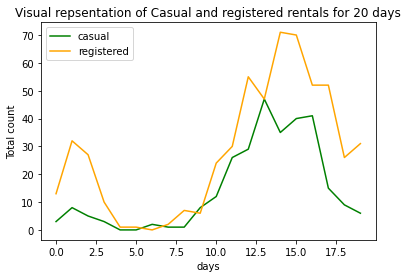

In [5]:
#Data Visualization

import matplotlib.pyplot as plt
ax=plt.gca()
training_data[['casual']][:20].plot(kind='line',color='Green',ax=ax)
training_data[['registered']][:20].plot(kind='line',color='Orange',ax=ax)
plt.title("Visual repsentation of Casual and registered rentals for 20 days")
plt.xlabel("days")
plt.ylabel("Total count")
plt.show()

In [6]:
cols= training_data[['hour','season','holiday','workingday','weather','temp','atemp','humidity','windspeed']]
aim= training_data['registered']

from sklearn.model_selection import train_test_split

training_cols,testing_cols,training_aim,testing_aim=train_test_split(cols,aim,test_size=0.2,random_state=42)

In [7]:
import math
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

#Random Forest regression 

random_forest_RM=RandomForestRegressor(n_estimators=1000,random_state=42)
random_forest_RM.fit(training_cols,training_aim)
#Root Mean Squared Error
RFRM_values=random_forest_RM.predict(testing_cols)
RMSE=math.sqrt(np.square(np.subtract(RFRM_values,testing_aim)).mean())
print("Root Mean Squared Error(Random Forest): ",RMSE)
#R_Squared
R_Squared_value = r2_score(testing_aim, RFRM_values)
print("R Squared Value(Random Forest): ", R_Squared_value)

Root Mean Squared Error(Random Forest):  61.49103999628978
R Squared Value(Random Forest):  0.8429075661850034


In [8]:
#linear_Regression 

Linear_regression_model=LinearRegression()
Linear_regression_model.fit(training_cols,training_aim)

LR_model=Linear_regression_model.predict(testing_cols)
RMSE=math.sqrt(np.square(np.subtract(LR_model,testing_aim)).mean())
print("Root Mean Squared Error(Linear Regression): ",RMSE)
#R_Squared
R_Squared_value = r2_score(testing_aim, RFRM_values)
print("R Squared Value(Linear Regression): ", R_Squared_value)

Root Mean Squared Error(Linear Regression):  130.67864477995832
R Squared Value(Linear Regression):  0.8429075661850034


In [9]:
 #desicion Tree Regression Model 

Decision_Tree_RM=DecisionTreeRegressor()
Decision_Tree_RM.fit(training_cols,training_aim)

DTRM_values=Decision_Tree_RM.predict(testing_cols)
RMSE=math.sqrt(np.square(np.subtract(DTRM_values,testing_aim)).mean())
print("Root Mean Squared Error(Decision Tree): ",RMSE)
#R_Squared
R_Squared_value = r2_score(testing_aim, DTRM_values)
print("R Squared Value(Decision Tree): ", R_Squared_value)

Root Mean Squared Error(Decision Tree):  80.10295571941384
R Squared Value(Decision Tree):  0.733419318167503


In [12]:
kn_regression_model=KNeighborsRegressor()
kn_regression_model.fit(training_cols,training_aim)
#Predicting on the Test Set and calcualting root mean squared error
KNN_model=kn_regression_model.predict(testing_cols)
RMSE=math.sqrt(np.square(np.subtract(KNN_model,testing_aim)).mean())
print("Root Mean Squared Error(KNN regression model): ",RMSE)
#R_Squared
R_Squared_value = r2_score(testing_aim, KNN_model)
print("R Squared Value(KNN regression model): ", R_Squared_value)

Root Mean Squared Error(KNN regression model):  111.9309064807977
R Squared Value(KNN regression model):  0.4794869366828822


In [11]:
#The lower value of RMSE implies higher accuracy of a regression mode
#from the above we can see that Random Forest has lower Root Mean Squared Error Value so it's the best model 
testing_data=pd.read_csv("https://raw.githubusercontent.com/unt-iialab/info5502-spring2022/main/datasets/lab_assignment_06/test_luc.csv",sep=',')
print("\nNumber of samples:",testing_data.shape[0],","" number of features:",testing_data.shape[1],"\n")

#adding new columns:Hour and month to the testing_data
testing_data['datetime']=pd.to_datetime(testing_data.datetime)
testing_data['hour'] = testing_data['datetime'].dt.hour
testing_data['month'] = testing_data['datetime'].dt.month

testing_data.head(5)
#testing_cols=
random_forest_RM.fit(cols,aim)
RFRM_values=random_forest_RM.predict(testing_data[['hour','season','holiday','workingday','weather','temp','atemp','humidity','windspeed']])
testing_data['registered']=np.round(RFRM_values,2)

random_forest_RM.fit(cols,aim)
RFRM_values=random_forest_RM.predict(testing_data[['hour','season','holiday','workingday','weather','temp','atemp','humidity','windspeed']])
testing_data['casual']=np.round(RFRM_values,2)

testing_data['count'] = testing_data['registered'] + testing_data['casual']
testing_data[['datetime','count']].to_csv('assignment6_saikrishna.csv',header=True,sep=',',index=False)
print("Predicted the counts and saved as assignment6_saikrishna.csv")


Number of samples: 1712 , number of features: 9 

Predicted the counts and saved as assignment6_saikrishna.csv


In [14]:
testing_data[['datetime','count']]

,datetime,count
0,2011-01-17 00:00:00,68.42
1,2011-01-17 01:00:00,54.80
2,2011-01-17 02:00:00,45.62
3,2011-01-17 03:00:00,27.00
4,2011-01-17 04:00:00,12.44
...,...,...
1707,2012-12-19 19:00:00,699.64
1708,2012-12-19 20:00:00,457.12
1709,2012-12-19 21:00:00,286.32
1710,2012-12-19 22:00:00,280.76
